In [18]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The Airline Passengers dataset contains 144 monthly records of the number of airline passengers in thousands from 1949 to 1960. The dataset shows how the demand for air travel changed over time and reflects the seasonal patterns and long-term trends in the industry.

In [19]:
#month as index
df = pd.read_csv('~/Downloads/airline-passengers.csv', index_col='Month', parse_dates=True)

In [20]:
#info about the data
df.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


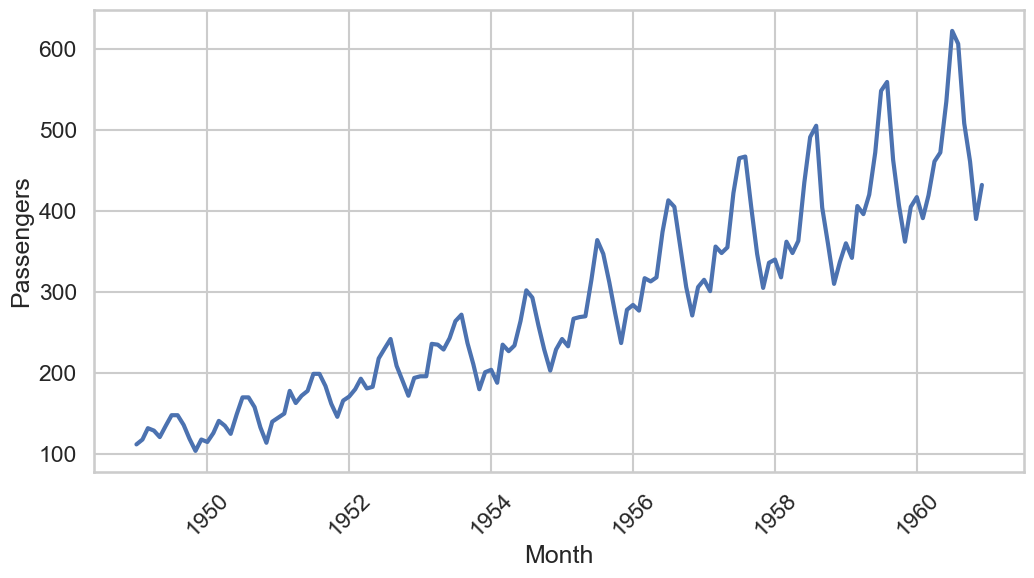

In [21]:
#plot the data using seaborn.
#place labels on x in vertical position
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x=df.index, y='Passengers', linewidth=3)
plt.xticks(rotation=45)
plt.show()



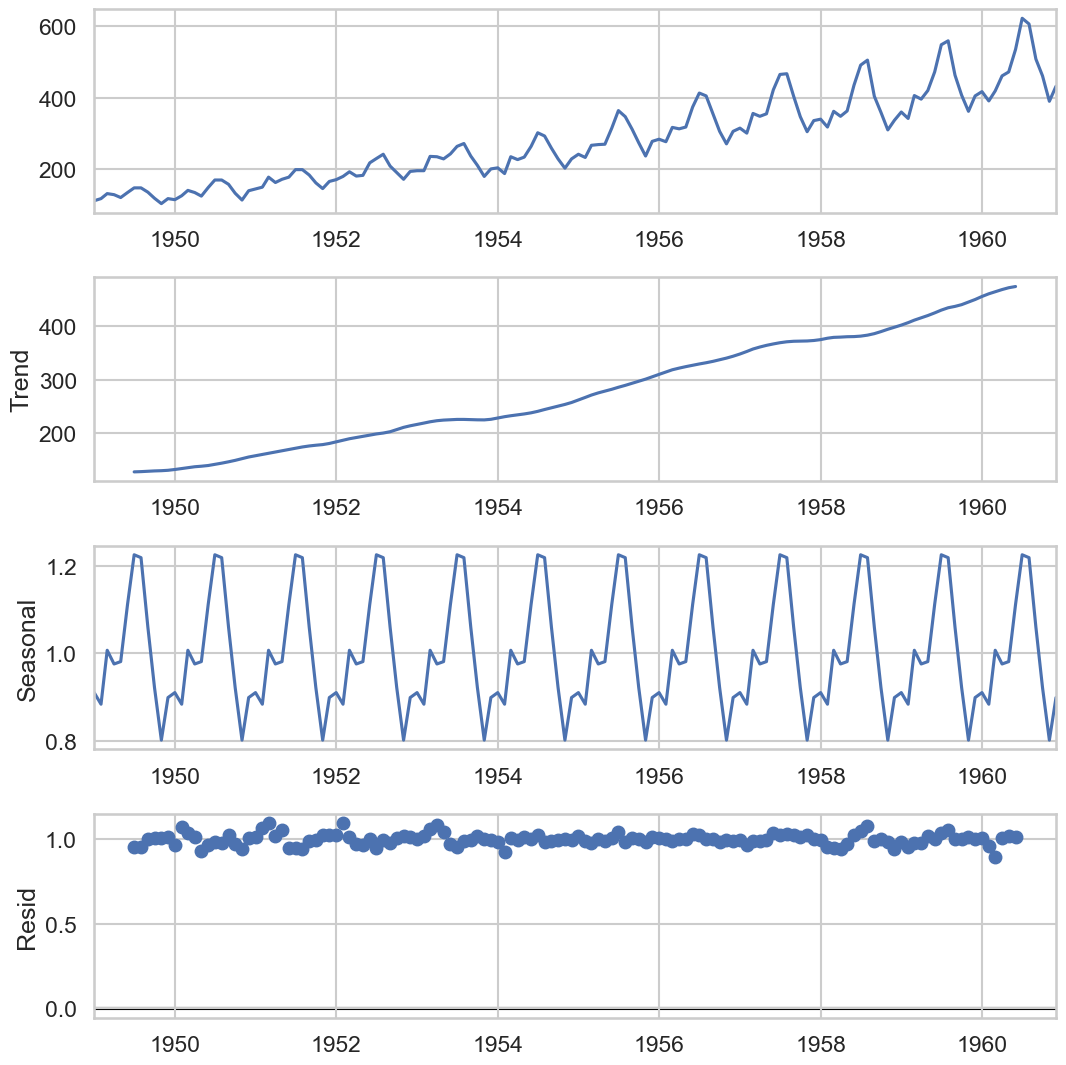

In [22]:
#seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative')
# size of the figure
plt.rcParams['figure.figsize'] = [11, 11]
result.plot()
plt.show()



## Moving Average

One way to compute the trend of a time series is to use a moving average. A moving average is a statistical technique that calculates the average of a subset of data points within a given window size. By sliding the window over the time series, we can obtain a smoothed curve that represents the trend of the data. The larger the window size, the more noise is removed from the data, but the less responsive the trend is to changes. The smaller the window size, the more noise is preserved in the data, but the more responsive the trend is to changes. Therefore, choosing an appropriate window size is important for computing the trend accurately and effectively.

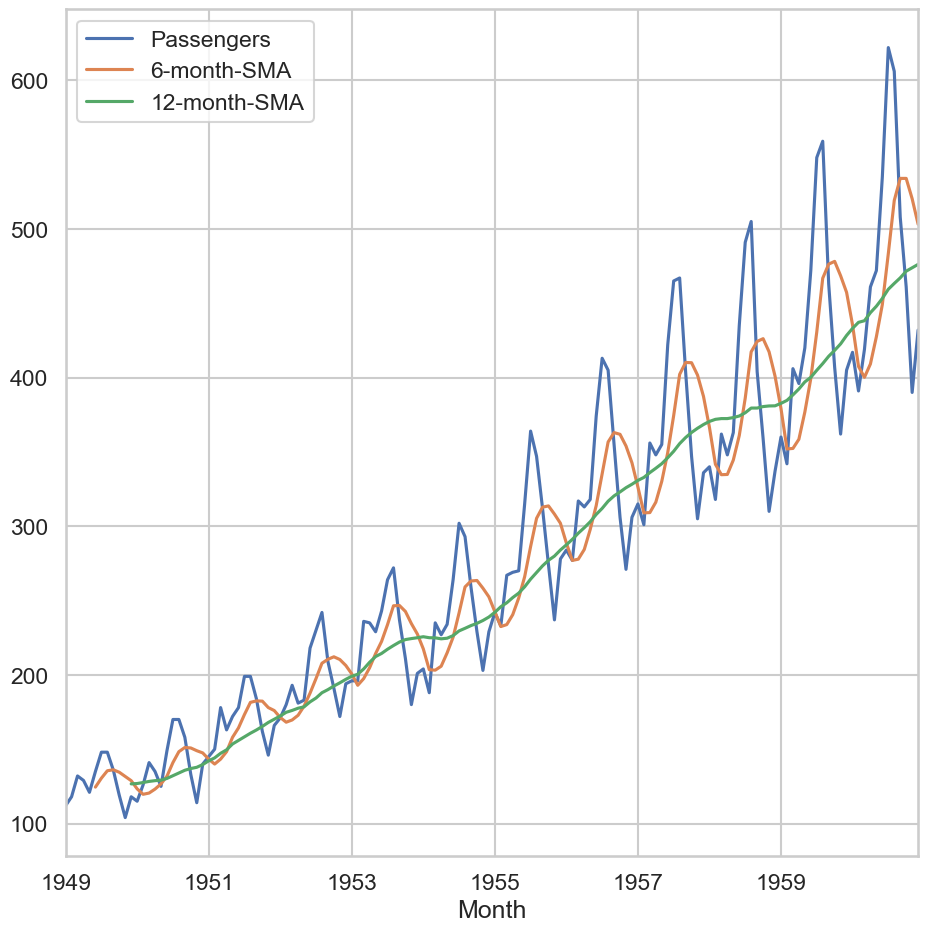

In [23]:
#compute the rolling mean
df['6-month-SMA'] = df['Passengers'].rolling(window=6).mean()
df['12-month-SMA'] = df['Passengers'].rolling(window=12).mean()
# What is Simple Moving Average (SMA)?
#https://www.investopedia.com/terms/s/sma.asp
df.plot()
plt.show()


## Cyclical component

To compute the cyclical component through division, you can follow these steps:

1. Obtain the original time series data: Start with the original time series data you want to analyze and extract the cyclical component from.

2. Remove the trend component: Before computing the cyclical component, it is essential to remove the trend component from the original data. This step helps isolate the cyclical behavior. There are various methods available for detrending, such as taking the difference between consecutive observations or applying a smoothing technique like moving averages or exponential smoothing.

3. Compute the average or mean: Calculate the average or mean of the detrended data. This represents the typical or expected level of the cyclical component.

4. Divide the detrended data by the average: Divide the detrended data by the average or mean calculated in the previous step. This division operation scales the detrended data relative to the expected level of the cyclical component.

The resulting values after division represent the cyclical component of the time series data. These values indicate how the data deviates from the expected cyclical behavior.

It's worth noting that this division method provides a simple approach to estimating the cyclical component. However, more sophisticated techniques, such as spectral analysis or filtering methods like the Hodrick-Prescott filter, are commonly used to capture cyclical patterns in time series analysis. These advanced methods may yield more accurate and robust results in complex scenarios.

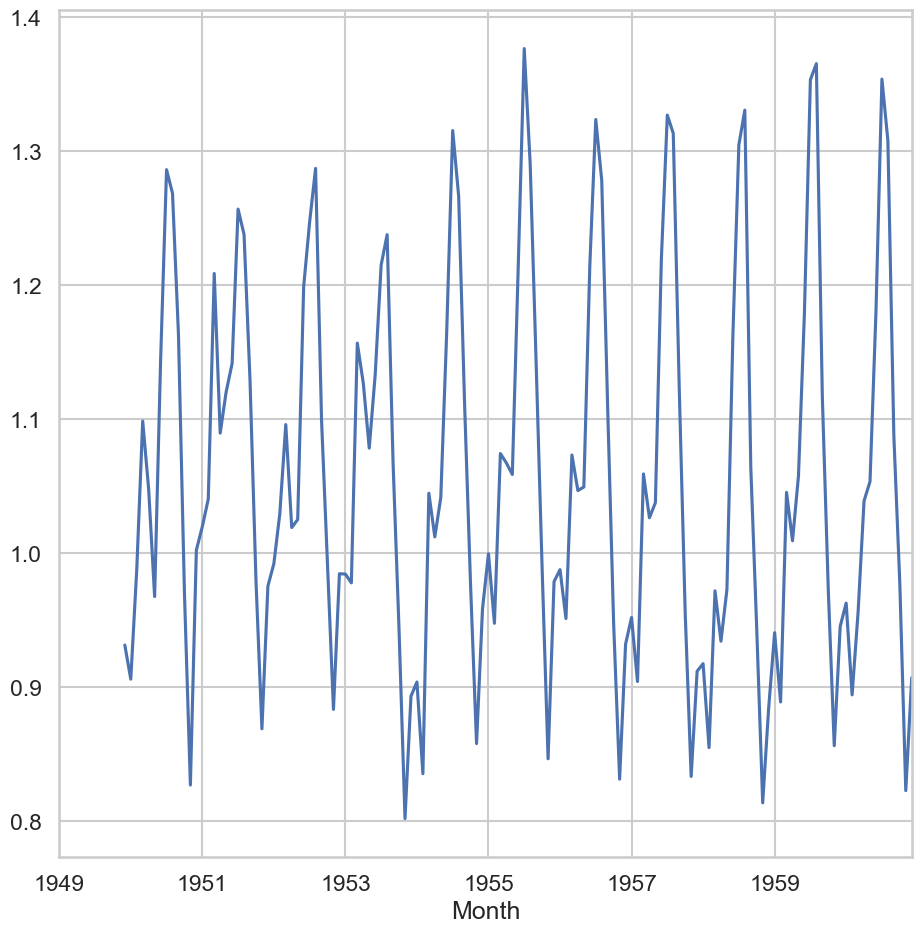

In [24]:
#compute the cyclical component
df['cyclical'] = df['Passengers'] / df['12-month-SMA']
df['cyclical'].plot()
plt.show()


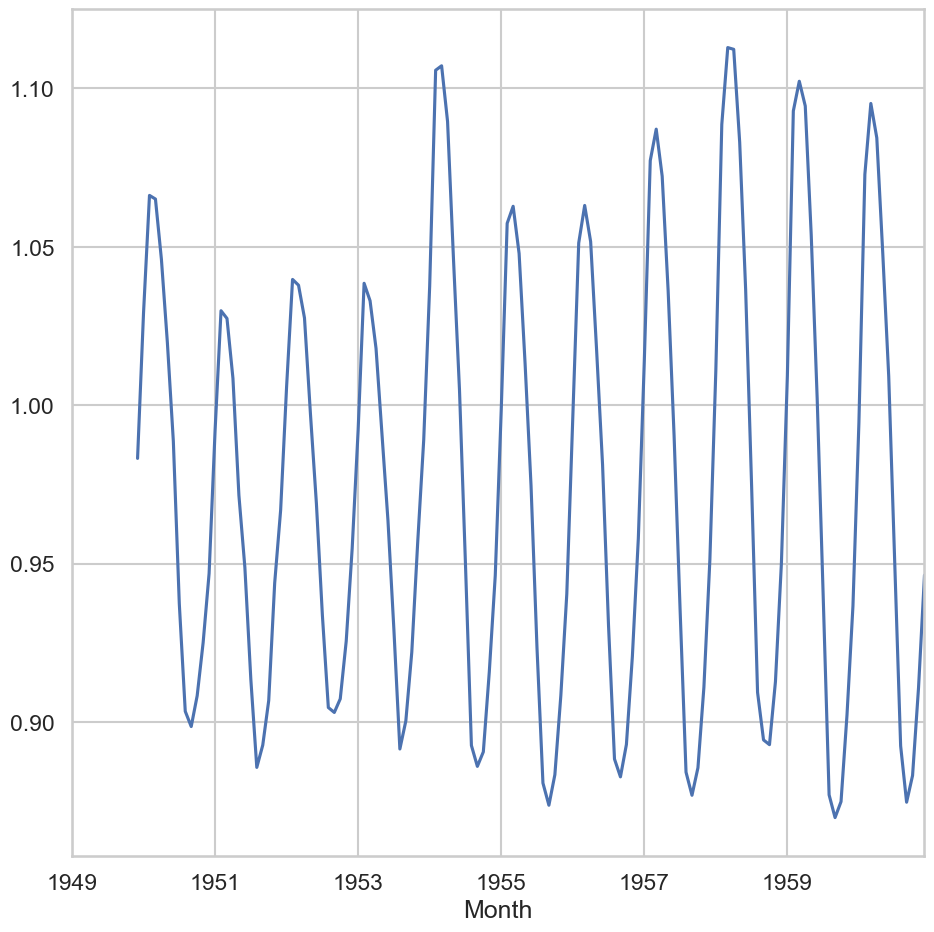

In [25]:
#compute the trend component
df['trend'] = df['12-month-SMA'] / df['6-month-SMA']
df['trend'].plot()
plt.show()


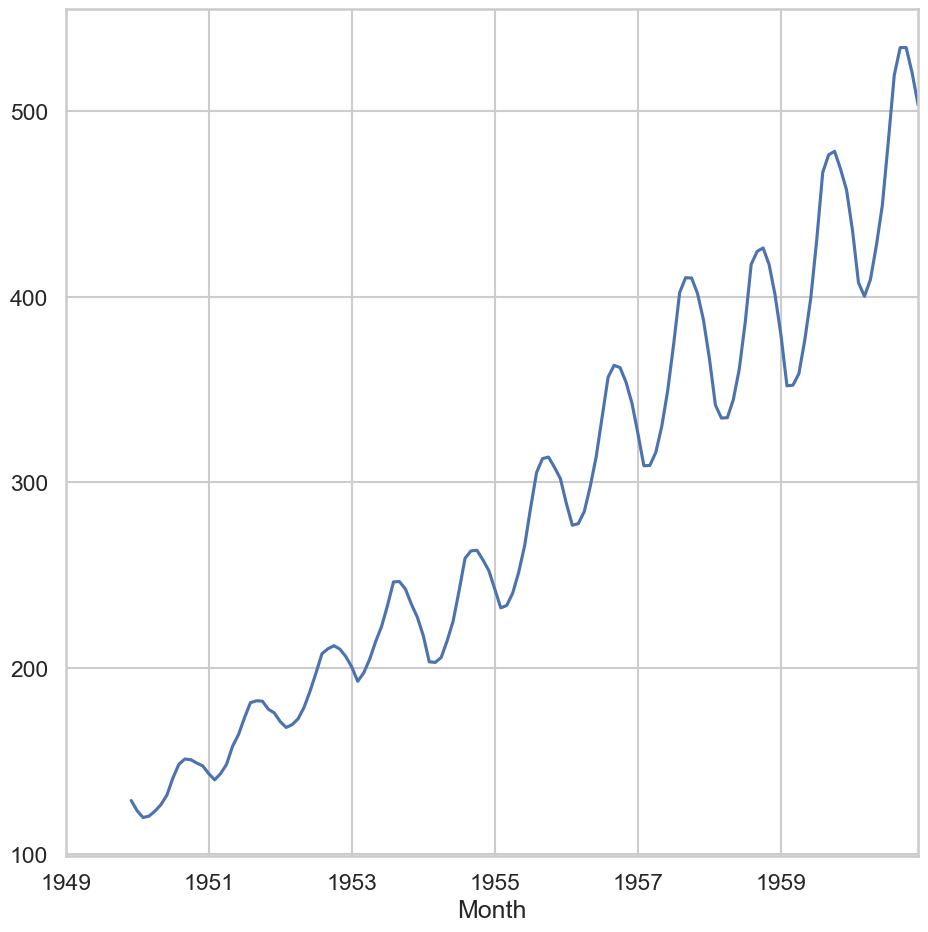

In [26]:
#compute the irregular component
df['irregular'] = df['Passengers'] / (df['trend'] * df['cyclical'])
df['irregular'].plot()
plt.show()


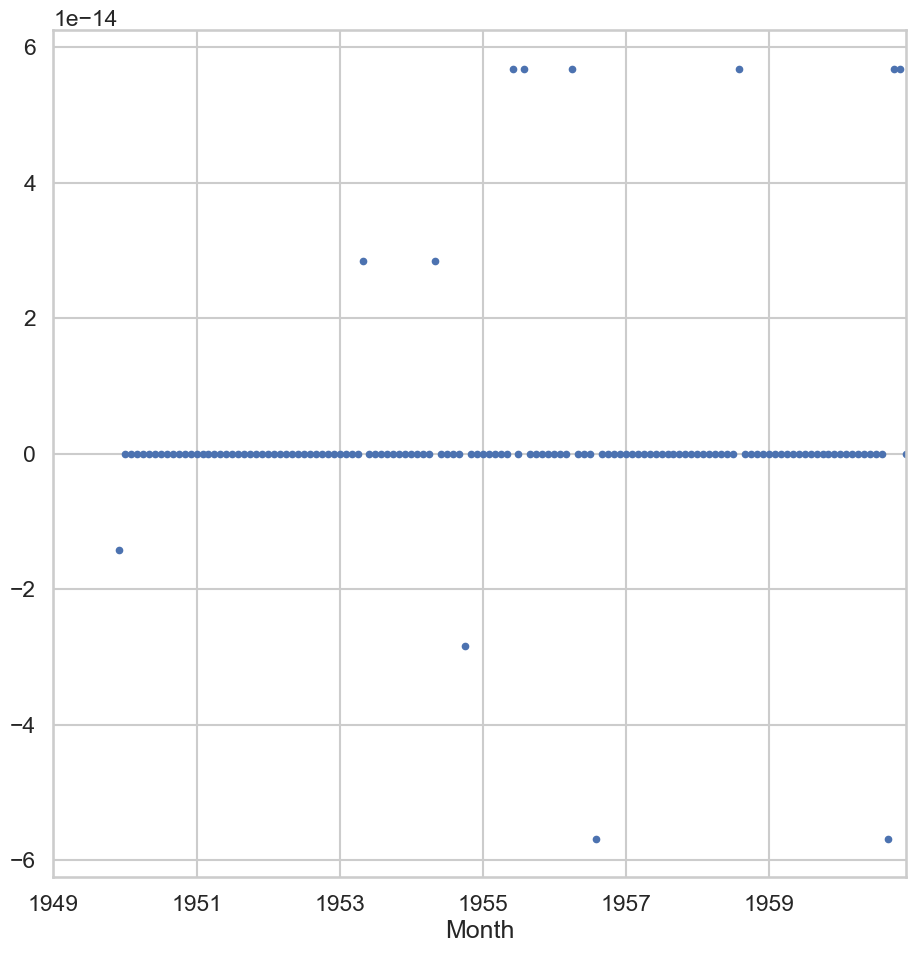

In [27]:
#compute the residual component using points from the cyclical, trend and irregular components
df['residual'] = df['Passengers'] - df['trend'] * df['cyclical'] * df['irregular']
# plot using dots from the residual component
df['residual'].plot(style='.')
plt.show()

